# Taylor Cina D212 Performance Assessment

## Task 2

In [18]:
#Part C Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

csv = pd.read_csv("churn_clean.csv", keep_default_na=False)
print(csv.info())
print(csv.describe(), "\n")

#list of numerical columns
csv = csv[['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
print(csv.head())

#Scale data, output to new dataframe
scaler = StandardScaler()
csv_scaled = pd.DataFrame(scaler.fit_transform(csv), columns = csv.columns)
print(csv_scaled.head())

#save to file
csv_scaled.to_csv("TCina D212 T2 Scaled.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

Eigenvalues:  [1.9931865274646032, 1.0241286544349206, 0.997599349140411, 0.9786287107393566, 0.006456758220708493]
Explained Variance:  [1.99338587 1.02423108 0.99769912 0.97872658 0.0064574 ]
Explained Variance Ratio:  [0.39863731 0.20482573 0.19951987 0.19572574 0.00129135]
Explained Variance Ratio:  [0.39863731 0.60346304 0.80298291 0.99870865 1.        ]


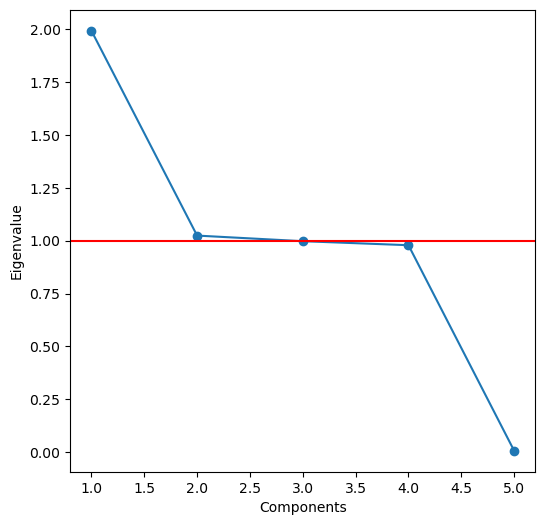

PCA Loading Matrix:
                         PC1       PC2       PC3       PC4       PC5
Income              0.003936  0.365683  0.897256  0.247368 -0.001250
Outage_sec_perweek  0.005858 -0.682929  0.078077  0.726276  0.000034
Tenure              0.705844  0.039973 -0.030063  0.035159 -0.705724
MonthlyCharge       0.040748 -0.631099  0.433512 -0.640363 -0.045361
Bandwidth_GB_Year   0.707159  0.000089 -0.000613 -0.005588  0.707032


In [21]:
#PCA

#perform PCA
pca = PCA(n_components = csv_scaled.shape[1])
csv_pca = pd.DataFrame(pca.fit_transform(csv_scaled))

#Generate Scree Plot
cov_matrix = np.dot(csv_scaled.T, csv_scaled) / csv_scaled.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

print("Eigenvalues: ", eigenvalues)
print("Explained Variance: ", pca.explained_variance_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_.cumsum())

plt.rcParams["figure.figsize"] = (6, 6)
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='red')
plt.show()

#Generate loading matrix
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
load_matrix = pd.DataFrame(pca.components_.T, columns=cols, index=csv_scaled.columns)
print("PCA Loading Matrix:")
print(load_matrix)